In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist import grid_finder
from mpl_toolkits.axisartist import floating_axes
import cartopy.crs as ccrs

In [113]:
import os
import sys
from pathlib import Path
SCRIPT_DIR = os.path.dirname(os.path.abspath("__init__.py"))
SRC_DIR = Path(SCRIPT_DIR).parent.parent.absolute()
print(SCRIPT_DIR)
print(SRC_DIR)
sys.path.append(os.path.dirname(SRC_DIR))

/Users/yannis/PycharmProjects/WeRec3D/src/validation_on_test_set
/Users/yannis/PycharmProjects/WeRec3D


In [114]:
from src.experiments_evaluation.validation_helpers import scale_t2m_back, scale_slp_back
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [115]:
MONTHS = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
dates_val = pd.date_range(start="1955-01-01", periods=3644, freq="D")
dates_test = pd.date_range(start="1950-01-01", periods=1820, freq="D")

## Load errors

### Validation

In [116]:
temp_ta_val = scale_t2m_back(np.load("../experiments_evaluation/ex5.1_elev_mov_cmi/errors/temp_t2m_err_99p.npy"), 
                         for_error=True)
temp_slp_val = scale_slp_back(np.load("../experiments_evaluation/ex5.1_elev_mov_cmi/errors/temp_slp_err_99p.npy"),
                              for_error=True)
print(temp_ta_val.shape)
print(temp_slp_val.shape)

spat_ta_val = scale_t2m_back(np.load("../experiments_evaluation/ex5.1_elev_mov_cmi/errors/spat_t2m_err_99p.npy"), 
                         for_error=True)
spat_slp_val = scale_slp_back(np.load("../experiments_evaluation/ex5.1_elev_mov_cmi/errors/spat_slp_err_99p.npy"),
                              for_error=True)
print(spat_ta_val.shape)
print(spat_slp_val.shape)

(3644,)
(3644,)
(32, 64)
(32, 64)


## Test

In [118]:
temp_ta_test = scale_t2m_back(np.load("outputs/temp_t2m_err_99p.npy"), 
                         for_error=True)
temp_slp_test = scale_slp_back(np.load("outputs/temp_slp_err_99p.npy"),
                              for_error=True)
print(temp_ta_test.shape)
print(temp_slp_test.shape)

spat_ta_test = scale_t2m_back(np.load("outputs/spat_t2m_err_99p.npy"), 
                         for_error=True)
spat_slp_test = scale_slp_back(np.load("outputs/spat_slp_err_99p.npy"),
                              for_error=True)
print(spat_ta_test.shape)
print(spat_slp_test.shape)

(1820,)
(1820,)
(32, 64)
(32, 64)


# Maps (Spatial)

In [120]:
# Define reduced size window
from src.config import BASE_LAT_START, BASE_LAT_END, BASE_LON_START, BASE_LON_END

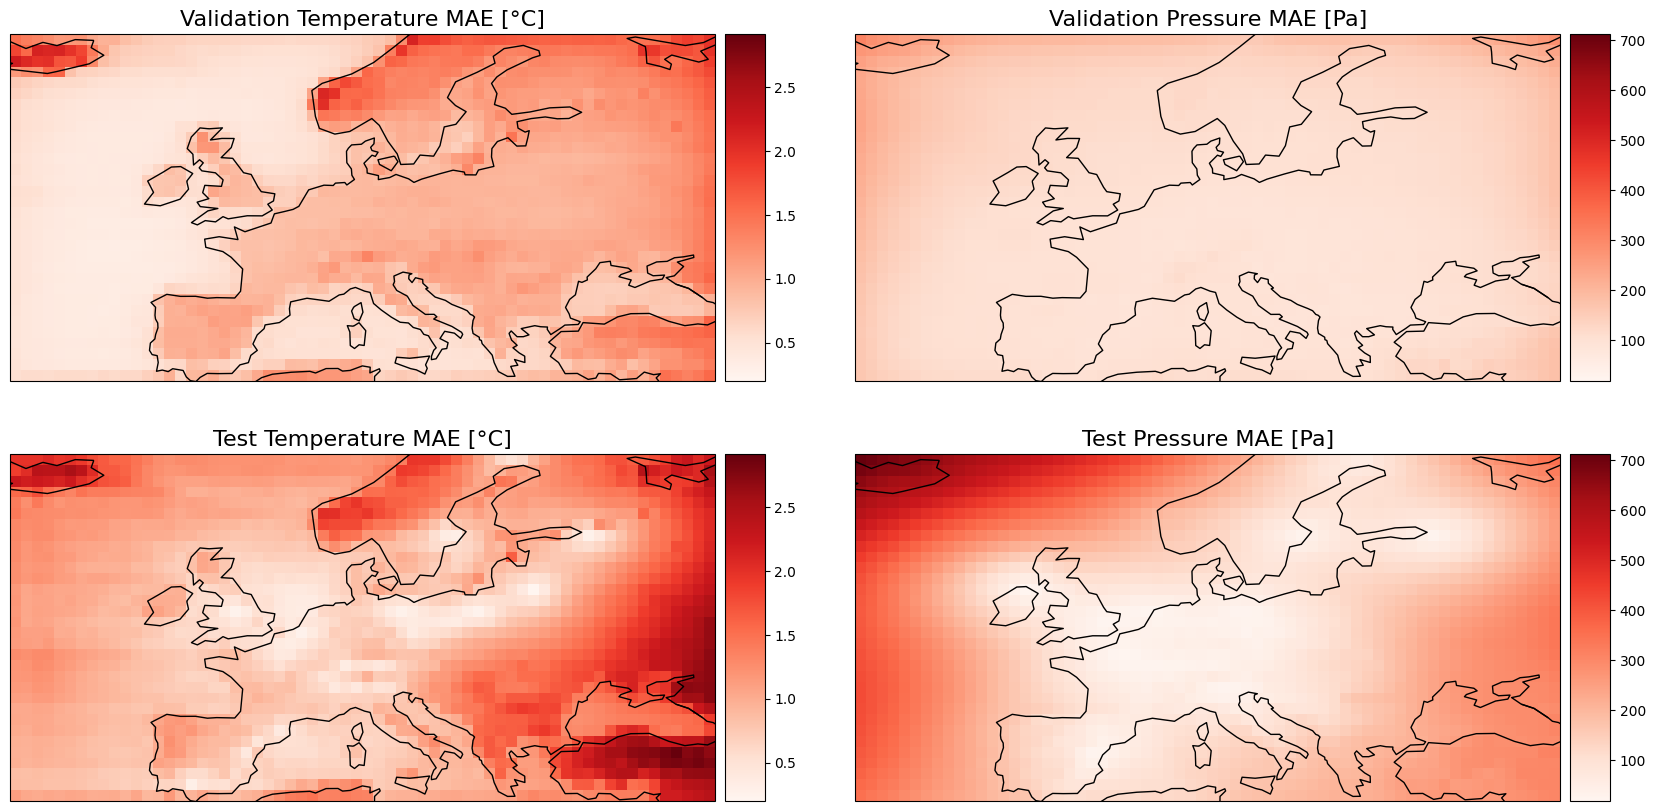

In [149]:
ta_spat_min = np.minimum(np.min(spat_ta_val), np.min(spat_ta_test))
ta_spat_max = np.maximum(np.max(spat_ta_val), np.max(spat_ta_test))

slp_spat_min = np.minimum(np.min(spat_slp_val), np.min(spat_slp_test))
slp_spat_max = np.maximum(np.max(spat_slp_val), np.max(spat_slp_test))

extent = [BASE_LON_START, BASE_LON_END, BASE_LAT_START,  BASE_LAT_END]

col_bar_width = 0.02
col_bar_x_offset = 0.005

fig = plt.figure(figsize=(20, 10))

# SPATIAL
# Validation Temperature
ax00 = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax00.coastlines(resolution='110m')
ax00.set_extent(extent, ccrs.PlateCarree())
im00 = ax00.imshow(spat_ta_val, 
                 transform=ccrs.PlateCarree(),
                 extent=extent,
                 origin='lower',
                 interpolation='nearest',
                 cmap='Reds',
                   vmin=ta_spat_min, vmax=ta_spat_max,
                   )
cax00 = fig.add_axes([ax00.get_position().x1 + col_bar_x_offset, 
                      ax00.get_position().y0, 
                      col_bar_width, 
                      ax00.get_position().height])
plt.colorbar(im00, cax=cax00)
ax00.set_title(f"Validation Temperature MAE [°C]", fontsize=16)

# Validation Pressure
ax01 = fig.add_subplot(2, 2, 2, projection=ccrs.PlateCarree())
ax01.coastlines(resolution='110m')
ax01.set_extent(extent, ccrs.PlateCarree())#,
im01 = ax01.imshow(spat_slp_val, 
                 transform=ccrs.PlateCarree(),
                 extent=extent,
                 origin='lower',
                 interpolation='nearest',
                 cmap='Reds',
                   vmin=slp_spat_min, vmax=slp_spat_max,)

cax01 = fig.add_axes([ax01.get_position().x1 + col_bar_x_offset, 
                      ax01.get_position().y0, 
                      col_bar_width,
                      ax01.get_position().height])
plt.colorbar(im01, cax=cax01)
ax01.set_title(f"Validation Pressure MAE [Pa]", fontsize=16)

# Test Temperature
ax10 = fig.add_subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax10.coastlines(resolution='110m')
ax10.set_extent(extent, ccrs.PlateCarree())
im10 = ax10.imshow(spat_ta_test, 
                 transform=ccrs.PlateCarree(),
                 extent=extent,
                 origin='lower',
                 interpolation='nearest',
                 cmap='Reds',
                   vmin=ta_spat_min, vmax=ta_spat_max,)
cax10 = fig.add_axes([ax10.get_position().x1 + col_bar_x_offset, 
                      ax10.get_position().y0,
                      col_bar_width, 
                      ax10.get_position().height])
plt.colorbar(im10, cax=cax10)
ax10.set_title(f"Test Temperature MAE [°C]", fontsize=16)


# Test Pressure
ax11 = fig.add_subplot(2, 2, 4, projection=ccrs.PlateCarree())
ax11.coastlines(resolution='110m')
ax11.set_extent(extent, ccrs.PlateCarree())
im11 = ax11.imshow(spat_slp_test, 
                 transform=ccrs.PlateCarree(),
                 extent=extent,
                 origin='lower',
                 interpolation='nearest',
                 cmap='Reds',
                   vmin=slp_spat_min, vmax=slp_spat_max,)
cax11 = fig.add_axes([ax11.get_position().x1 + col_bar_x_offset, 
                      ax11.get_position().y0,
                      col_bar_width, 
                      ax11.get_position().height])
plt.colorbar(im11, cax=cax11)
ax11.set_title(f"Test Pressure MAE [Pa]", fontsize=16)


plt.savefig(f"figures/val_test_spatial.png", 
            bbox_inches='tight',
            pad_inches=0.1)

# Boxplots (Temporal)

In [150]:
df_temporal_val = pd.DataFrame({
    "err_ta": temp_ta_val,
    "err_slp": temp_slp_val,
    "month": dates_val.month
})
df_temporal_test = pd.DataFrame({
    "err_ta": temp_ta_test,
    "err_slp": temp_slp_test,
    "month": dates_test.month
})

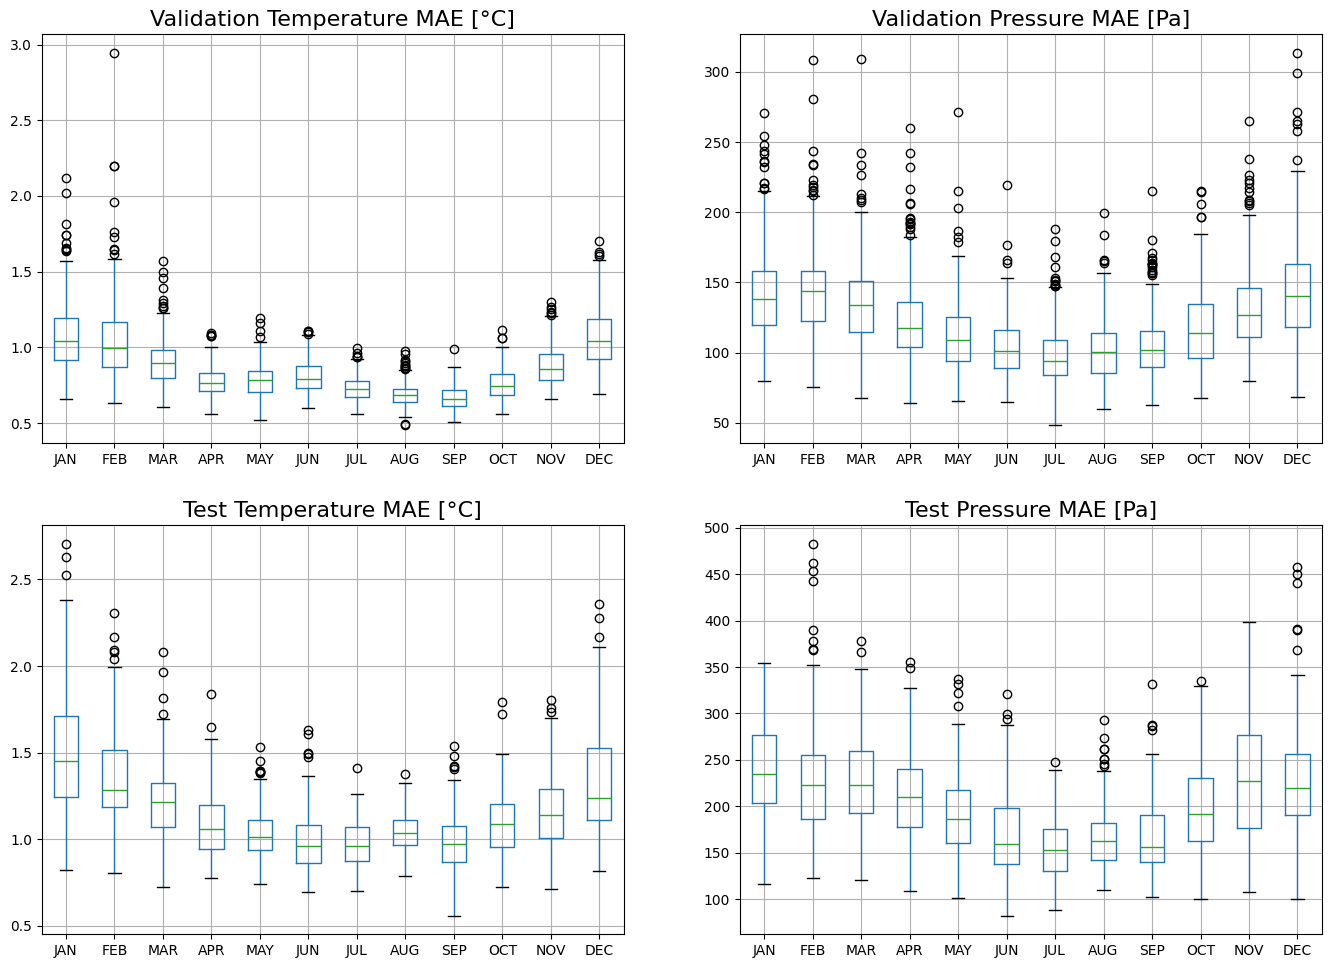

In [168]:
fig = plt.figure(figsize=(16, 12))

# BOX PLOTS
# Validation Temperature
ax00 = fig.add_subplot(2, 2, 1)
df_temporal_val.boxplot(column=['err_ta'], by='month', ax=ax00)
ax00.set(xlabel="", ylabel='')
ax00.set_xticks([m+1 for m in range(12)], [MONTHS[i] for i in range(12)])
ax00.set_title(f"Validation Temperature MAE [°C]", fontsize=16)

# Validation Pressure
ax01 = fig.add_subplot(2, 2, 2)
df_temporal_val.boxplot(column=['err_slp'], by='month', ax=ax01)
ax01.set(xlabel="", ylabel='')
ax01.set_xticks([m+1 for m in range(12)], [MONTHS[i] for i in range(12)])
ax01.set_title(f"Validation Pressure MAE [Pa]", fontsize=16)

# TEST Temperature
ax10 = fig.add_subplot(2, 2, 3)
df_temporal_test.boxplot(column=['err_ta'], by='month', ax=ax10)
ax10.set(xlabel="", ylabel='')
ax10.set_xticks([m+1 for m in range(12)], [MONTHS[i] for i in range(12)])
ax10.set_title(f"Test Temperature MAE [°C]", fontsize=16)

# Validation Pressure
ax11 = fig.add_subplot(2, 2, 4)
df_temporal_test.boxplot(column=['err_slp'], by='month', ax=ax11)
ax11.set(xlabel="", ylabel='')
ax11.set_xticks([m+1 for m in range(12)], [MONTHS[i] for i in range(12)])
ax11.set_title(f"Test Pressure MAE [Pa]", fontsize=16)

plt.suptitle('')

plt.savefig(f"figures/val_test_temporal.png", 
            bbox_inches='tight',
            pad_inches=0.1)